In [51]:
# Task 3 SPAM SMS DETECTION Using Machine Learning at CodSoft Submitted by Harinandhan

In [52]:
#Build an AI model that can classify SMS messages as spam or
#legitimate. Use techniques like TF-IDF or word embeddings with
#classifiers like Naive Bayes, Logistic Regression, or Support Vector
#Machines to identify spam messages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Warnings
import warnings
warnings.filterwarnings('ignore')
# Styles
plt.style.use('ggplot')
sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['patch.force_edgecolor'] = True
# Text Preprocessing
import nltk
# nltk.download("all")
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize


In [10]:
pip install spacy


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/39/e1/08681583569f435347ced0535b27c073fcc9a927d9b4293c963092f2d01c/spacy-3.7.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
messages = pd.read_csv("spam .csv", encoding = 'latin-1') # I have choosen the data set which is given by the codsoft 

# Drop the extra columns and rename columns

messages = messages.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
messages.columns = ["category", "text"]

In [25]:
display(messages.head(n = 10))

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [26]:
## Lets see at the dataset info to see if everything is alright
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

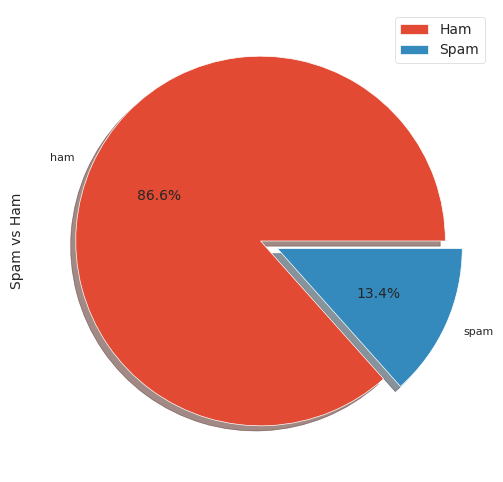

In [27]:
#see what precentage of our data is spam/ham
messages["category"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [28]:
# A lot of messages are actually not spam. About 86% of our dataset consists of normal messages.

# While we split our data set into train and test or when we use cross validation, 
# we will have to use stratified sampling, otherwise we have a chance of our training model being skewed towards normal messages. 
# If the sample we choose to train our model consists majorly of normal messages, it may end up predicting everything as ham and we might not be able to figure this out since most of the messages we get are actually ham and will have a pretty good accuracy.

# A very basic model would be a model that predicts everything as ham. 
# It would have a decent accuracy. But then again, is that right? No. We will then have to use an accuracy metric that keeps this in mind. Goal : We don't mind if we miss the odd spam message but we surely don't want to mark a ham message as spam i.e Precision is very important. 
# Hence we will use fbeta score as our accuracy metric with inclination towards Precision

In [30]:
# Lets see the top spam/ham messages
topMessages = messages.groupby("text")["category"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed å£1000 cash or å£5000 prize!,4,spam
Okie,4,ham
"Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...",4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\""... good morning dear""",4,ham


In [31]:
# So. People are really busy it seems. "Sorry, i'll call later" tops the ham message list with 30 counts with "I cant pick the phone right now. 
# Pls send a message" comes second with 12 counts.

# Theres a quite lot of Ok..., Okie and Ok. in there too :>

In [33]:
#Lets see individual Spam/ham words
spam_messages = messages[messages["category"] == "spam"]["text"]
ham_messages = messages[messages["category"] == "ham"]["text"]

spam_words = []
ham_words = []

# Since this is just classifying the message as spam or ham, we can use isalpha(). 
# This will also remove the not word in something like can't etc. 
# In a sentiment analysis setting, its better to use 
# sentence.translate(string.maketrans("", "", ), chars_to_remove)

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [35]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.2 kB 388.9 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 581.0 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/300.2 kB 581.0 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 841.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 689.9 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 689.9 kB/s eta 0:00:01
   ------------

DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [36]:
from wordcloud import WordCloud

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

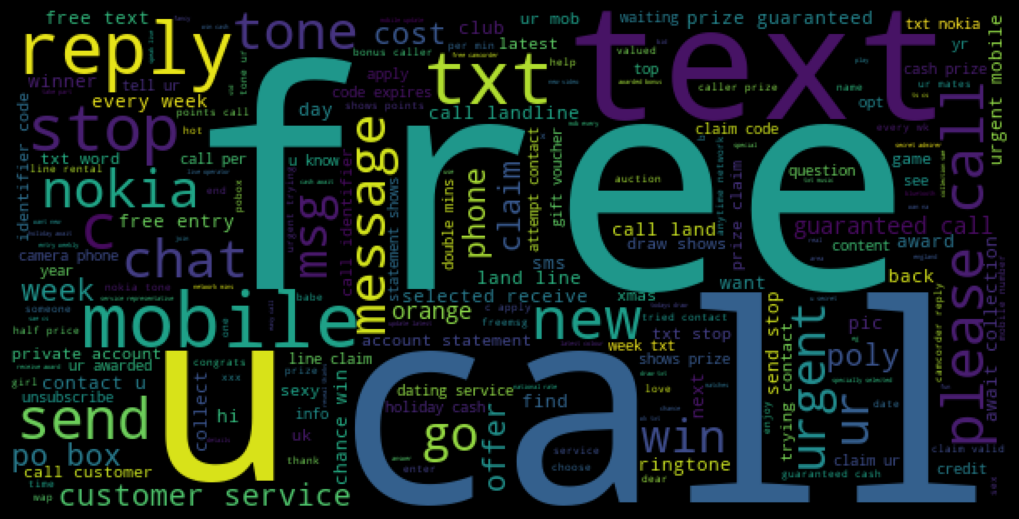

In [54]:
#Spam Word cloud

spam_wordcloud = WordCloud(width=600, height=300).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

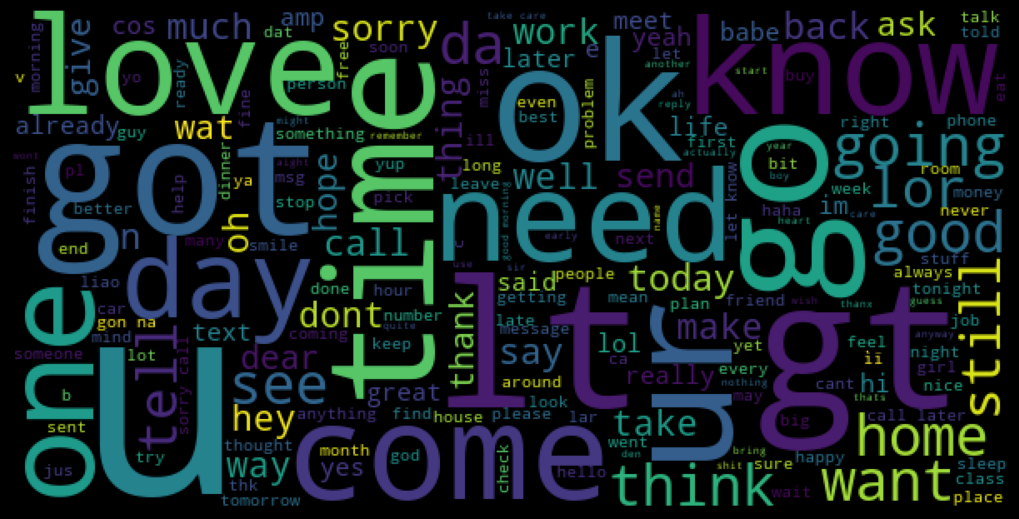

In [53]:
#Ham word cloud

ham_wordcloud = WordCloud(width=600, height=300).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [57]:
# Top 10 spam words

spam_words = np.array(spam_words)
print("Top 20 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 20) #lets check for 20 spam  words 

Top 20 Spam words are :



call       346
free       219
txt        156
u          144
ur         144
mobile     123
text       121
stop       114
claim      113
reply      104
prize       92
get         84
new         69
send        68
nokia       65
cash        62
urgent      62
win         60
contact     56
service     55
Name: count, dtype: int64

In [58]:
# Top 10 Ham words

ham_words = np.array(ham_words)
print("Top 20 Ham words are :\n")
pd.Series(ham_words).value_counts().head(n = 20)# Lets check for top 20 ham words

Top 20 Ham words are :



u        989
gt       318
lt       316
get      301
ok       261
go       248
got      242
ur       237
know     236
like     231
call     230
good     229
come     227
time     197
love     191
day      185
going    169
one      167
want     163
lor      162
Name: count, dtype: int64

In [59]:
messages["messageLength"] = messages["text"].apply(len)
messages["messageLength"].describe()

count    5572.000000
mean       50.281766
std        39.465309
min         0.000000
25%        21.000000
50%        37.000000
75%        73.250000
max       477.000000
Name: messageLength, dtype: float64

findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were found: Ubuntu
findfont: Generic family 'serif' not found because none of the following families were foun

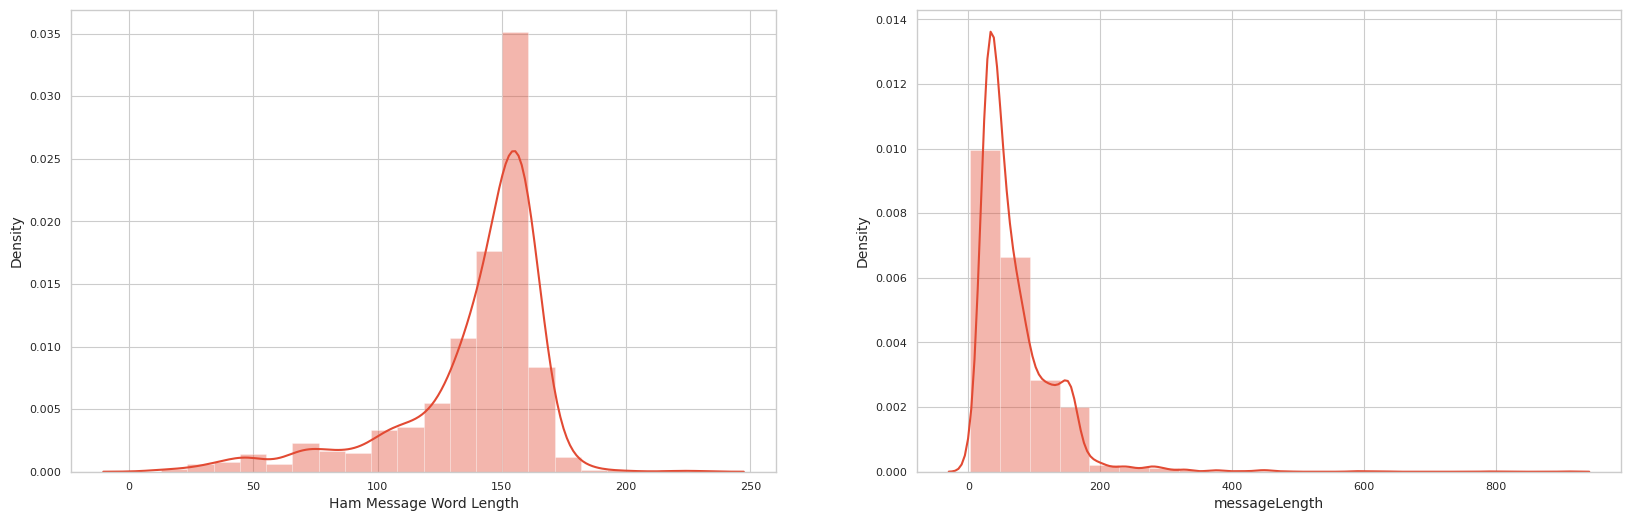

In [42]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(messages[messages["category"] == "spam"]["messageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(messages[messages["category"] == "ham"]["messageLength"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

In [43]:
#Looks like spam messages are usually longer. 
#Maybe messageLength can become a feature to predict whether the message is spam/ ham ?

In [44]:
#Lets clean our data by removing punctuations/ stopwords and stemming words

In [45]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

messages["text"] = messages["text"].apply(cleanText)
messages.head(n = 10)    

,category,text,messageLength
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah dont think goe usf live around though,61
5,spam,freemsg hey darl 3 week word back id like fun ...,148
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea å£9...,158
9,spam,mobil 11 month u r entitl updat latest colour ...,154


In [46]:
# Lets convert our clean text into a representation that a machine learning model can understand. I'll use the Tfifd for this.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["text"])
print(features.shape)

(5572, 7903)


In [48]:
#MODEL APPLICATION

In [49]:
def encodeCategory(cat):
    if cat == "spam":
        return 1
    else:
        return 0
        
messages["category"] = messages["category"].apply(encodeCategory)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, messages["category"], stratify = messages["category"], test_size = 0.2)

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

from sklearn.naive_bayes import MultinomialNB
gaussianNb = MultinomialNB()
gaussianNb.fit(X_train, y_train)

y_pred = gaussianNb.predict(X_test)

print(fbeta_score(y_test, y_pred, beta = 0.5))

0.9132007233273056
